## PRNN Assignment - 5.2

### create softmax function

In [3]:
#import files
import numpy as np

In [5]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [7]:
#test above defined function
a = np.array([10, 20, 30])
s = softmax(a)

print(f"output of softmax: {s}")

output of softmax: [2.06106005e-09 4.53978686e-05 9.99954600e-01]


In [9]:
a = np.array([900, 1000])
s = softmax(a)

print(f"output of softmax: {s}")

output of softmax: [nan nan]


/var/folders/tc/p09j7ll56zbbhd266ds5wqh40000gn/T/ipykernel_42039/675541793.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a) / np.sum(np.exp(a))
/var/folders/tc/p09j7ll56zbbhd266ds5wqh40000gn/T/ipykernel_42039/675541793.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a) / np.sum(np.exp(a))


In [ ]:
#another version of softmax function

In [11]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [ ]:
#solving above eerror with above newly defined function

In [13]:
a = np.array([900, 1000])
s = softmax(a)

print(f"output of softmax: {s}")

output of softmax: [3.72007598e-44 1.00000000e+00]


In [ ]:
MNIST dataset

In [ ]:
#import files

In [15]:
import os
import gzip
import pickle
import urllib
import numpy as np

In [17]:
#define the dataset directory path
DATASET_DIR = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset'

#pickle file path
DATASET_PKL = 'mnist.pkl'

#declare the base url
URL_BASE = 'http://jrkwon.com/data/ece5831/mnist/'

#declare the dictionary which will be responsible for holding the zip file names
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

In [19]:
key_file['train_images']

'train-images-idx3-ubyte.gz'

In [21]:
!pwd

/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2


In [23]:
file_name = key_file['train_images']
file_path = URL_BASE + key_file['train_images']

def download(f_name):
    file_path = DATASET_DIR + '/' + f_name
    if(os.path.exists(file_path)):
        print(f"File: {f_name} already exists.")
        return

    print(f"Downloading {f_name}....")
    urllib.request.urlretrieve(URL_BASE + f_name, file_path)
    
    print('Done')

def download_all():
    for file_name in key_file.values():
        download(file_name)

In [25]:
download_all()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.


In [ ]:
#load image, load label

In [27]:
IMAGE_SIZE = 784 #28 x 28
def load_image(f_name):
    with gzip.open(f_name, 'rb') as img_file:
        images = np.frombuffer(img_file.read(), np.uint8, offset=16)
    images = images.reshape(-1, IMAGE_SIZE)

    return images

In [29]:
train_images = load_image(os.path.join(DATASET_DIR, key_file['train_images']))
test_images = load_image(os.path.join(DATASET_DIR, key_file['test_images']))
print(f"test images shape: {test_images.shape}")
print(f"train images shape: {train_images.shape}")

test images shape: (10000, 784)
train images shape: (60000, 784)


In [ ]:
#samople img

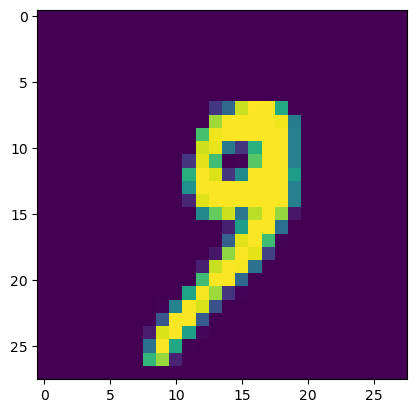

In [31]:
import matplotlib.pyplot as plt
idx = 1000
a = test_images[idx].reshape(28, 28)
plt.imshow(a)

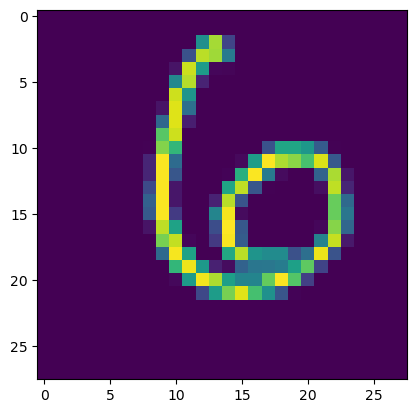

In [33]:
a = test_images[100].reshape(28, 28)
plt.imshow(a)

In [35]:
def load_labels(f_name):
    with gzip.open(f_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

In [37]:
train_labels = load_labels(os.path.join(DATASET_DIR, key_file['train_labels']))
test_labels = load_labels(os.path.join(DATASET_DIR, key_file['test_labels']))
print(f"train images shape: {train_labels.shape}")
print(f"test images shape: {test_labels.shape}")

train images shape: (60000,)
test images shape: (10000,)


In [39]:
test_labels[idx]

9

In [41]:
def create_dataset():
    dataset = {}
    dataset['train_images'] =  train_images
    dataset['train_labels'] =  train_labels
    dataset['test_images'] =  test_images
    dataset['test_labels'] =  test_labels

    with open(os.path.join(DATASET_DIR, DATASET_PKL), 'wb') as ip_file:
        print(f'Pickle: {os.path.join(DATASET_DIR, DATASET_PKL)} is being created.')
        pickle.dump(dataset, ip_file)
        print('Done')

    return dataset

Pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset/mnist.pkl is being created.
Done


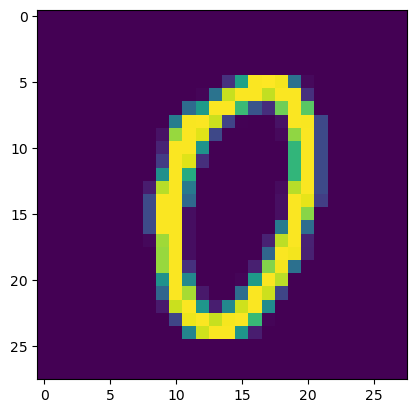

In [43]:
dataset = create_dataset()

#lets check whether dataset got loaded properly or not
img = dataset['train_images'][idx].reshape(28, 28)
plt.imshow(img)

label: 9


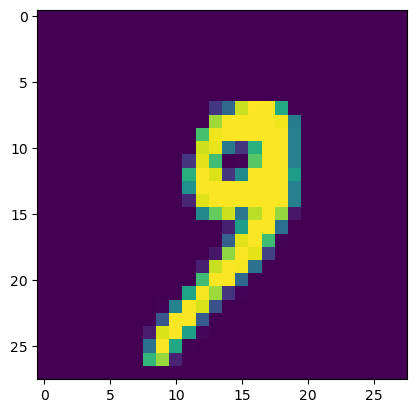

In [45]:
img = dataset['test_images'][idx].reshape(28, 28)
plt.imshow(img)
print(f"label: {dataset['test_labels'][idx]}")

In [47]:
def change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    return t

In [51]:
y = np.array([1, 0, 9, 8])
one_hot_y = change_one_hot_label(y, 10)
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [53]:
def init_dataset():
    download_all()
    if os.path.exists(os.path.join(DATASET_DIR, DATASET_PKL)):
        with open(os.path.join(DATASET_DIR, DATASET_PKL), 'rb') as ip_file:
            print(f"Pickle: {os.path.join(DATASET_DIR, DATASET_PKL)} already")
            print('Loading...')
            dataset = pickle.load(ip_file)
            print('Done')
    else:
        dataset = create_dataset()
    
    return dataset
        

In [55]:
dataset = {}
dataset = init_dataset()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset/mnist.pkl already
Loading...
Done


In [57]:
dataset = init_dataset()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset/mnist.pkl already
Loading...
Done


In [59]:
dataset['train_images'].shape

(60000, 784)

In [ ]:
#MNIST data class

In [ ]:
#imports

In [61]:
import os
import gzip
import pickle
import urllib
import numpy as np

In [63]:
class MNIST_Data():
    DATASET_DIR = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset'
    DATASET_PKL = 'mnist.pkl'
    URL_BASE = 'http://jrkwon.com/data/ece5831/mnist/'
    IMAGE_SIZE = 784 #28 x 28
    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }
    
    def __init__(self):
        self.dataset = {}
        self.pkl_dataset_path = os.path.join(self.DATASET_DIR, self.DATASET_PKL)

        self.init_dataset()  
    def change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t
    
    def _download(self, f_name):
        file_path = self.DATASET_DIR + '/' + f_name
        if(os.path.exists(file_path)):
            print(f"File: {f_name} already exists.")
            return

        print(f"Downloading {f_name}....")
        urllib.request.urlretrieve(self.URL_BASE + f_name, file_path)
        
        print('Done')

    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)
    
    def load_image(self, f_name):
        with gzip.open(f_name, 'rb') as img_file:
            images = np.frombuffer(img_file.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.IMAGE_SIZE)

        return images

    def load_labels(self, f_name):
        with gzip.open(f_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def create_dataset(self):
        self.dataset['train_images'] =  self.load_image(os.path.join(self.DATASET_DIR, self.key_file['train_images']))
        self.dataset['train_labels'] =  self.load_labels(os.path.join(self.DATASET_DIR, self.key_file['train_labels']))
        self.dataset['test_images'] =  self.load_image(os.path.join(self.DATASET_DIR, self.key_file['test_images']))
        self.dataset['test_labels'] =  self.load_labels(os.path.join(self.DATASET_DIR, self.key_file['test_labels']))
        
        with open(self.pkl_dataset_path, 'wb') as ip_file:
            print(f'Pickle: {self.pkl_dataset_path} is being created.')
            pickle.dump(self.dataset, ip_file)
            print('Done')

        return self.dataset
    
    def init_dataset(self):
        self._download_all()
        if os.path.exists(self.pkl_dataset_path):
            with open(self.pkl_dataset_path, 'rb') as ip_file:
                print(f"Pickle: {self.pkl_dataset_path} already")
                print('Loading...')
                self.dataset = pickle.load(ip_file)
                print('Done')
        else:
            self.create_dataset()
    
    def load(self):
        # normalize the image dataset 
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0
        
        #one hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = change_one_hot_label(self.dataset[key], 10)
        
        return (self.dataset['train_images'], self.dataset['train_labels']), (self.dataset['test_images'], self.dataset['test_labels']) 

In [65]:
mnist_data = MNIST_Data()
(train_images, train_labels), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-2/dataset/mnist.pkl already
Loading...
Done


In [67]:
print(f"test images shape :- {test_images.shape}")
print(f"test labels shape :- {test_labels.shape}")
print(f"train images shape :- {train_images.shape}")
print(f"train labels shape :- {train_labels.shape}")


test images shape :- (10000, 784)
test labels shape :- (10000, 10)
train images shape :- (60000, 784)
train labels shape :- (60000, 10)


label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


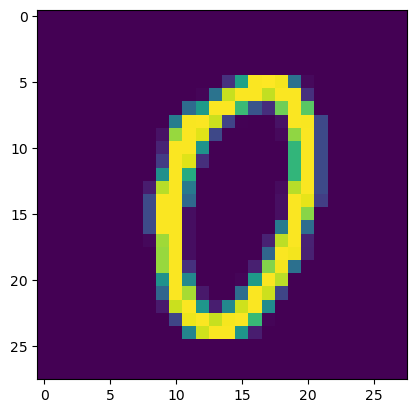

In [69]:
idx = 1000
img = mnist_data.dataset['train_images'][idx].reshape(28, 28)
print(f"label: {mnist_data.dataset['train_labels'][idx]}")
plt.imshow(img)

label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


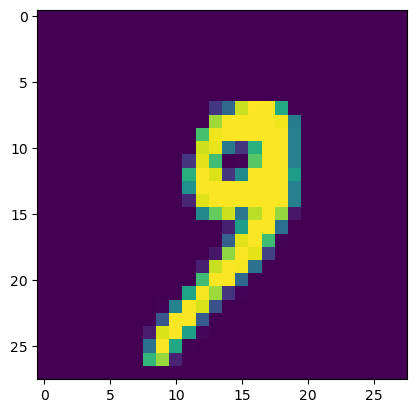

In [71]:
idx = 1000
img = mnist_data.dataset['test_images'][idx].reshape(28, 28)
print(f"label: {mnist_data.dataset['test_labels'][idx]}")
plt.imshow(img)